<a href="https://colab.research.google.com/github/ChethanaVaisali/COVID_19/blob/master/COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [2]:
!ls '/gdrive/My Drive/CV Assignment 2/Train_Data/'

trainx.npy  trainy.npy


In [3]:
import numpy as np
trainx = np.load('/gdrive/My Drive/CV Assignment 2/Train_Data/trainx.npy')
trainy = np.load('/gdrive/My Drive/CV Assignment 2/Train_Data/trainy.npy')

print(trainx.shape,trainy.shape)

(2318, 512, 512, 3) (2318,)


In [4]:
unique, counts = np.unique(trainy, return_counts = True)
print(unique, counts)

[0 1 2] [ 170 1072 1076]


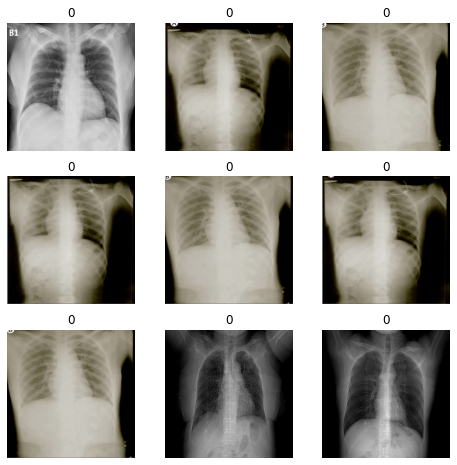

In [5]:
## Visualise some COVID - 19 images
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows = 3, ncols= 3, figsize =  (8,8))
for i, ax in enumerate(axs.flat):
  ax.imshow(trainx[i], cmap ='gray')
  ax.set_title(trainy[i])
  ax.axis('off')

plt.show()



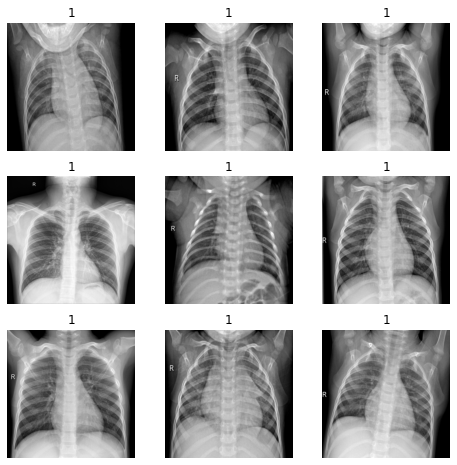

In [6]:
## Visualise some normal images
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows = 3, ncols= 3, figsize =  (8,8))
for i, ax in enumerate(axs.flat):
  ax.imshow(trainx[i+ 170], cmap ='gray')
  ax.set_title(trainy[i + 170])
  ax.axis('off')

plt.show()



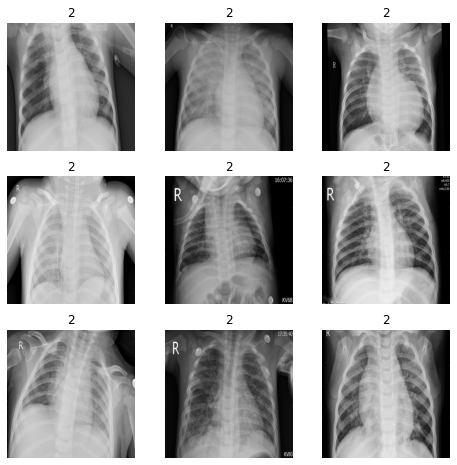

In [7]:
## Visualise some viral pneumonia images
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows = 3, ncols= 3, figsize =  (8,8))
for i, ax in enumerate(axs.flat):
  ax.imshow(trainx[i + 1250], cmap ='gray')
  ax.set_title(trainy[i + 1250])
  ax.axis('off')

plt.show()



In [8]:
!pip install git+https://github.com/rcmalli/keras-squeezenet.git
!pip install keras_squeezenet

  Cloning https://github.com/rcmalli/keras-squeezenet.git to /tmp/pip-req-build-m14zwgwe
  Running command git clone -q https://github.com/rcmalli/keras-squeezenet.git /tmp/pip-req-build-m14zwgwe
  Created wheel for keras-squeezenet: filename=keras_squeezenet-0.4-cp36-none-any.whl size=4425 sha256=e473c0d4667de44cdedfbc45895c5e4727f01138ee8b3a3a45aea3a227b4d63d
  Stored in directory: /tmp/pip-ephem-wheel-cache-wwv641bg/wheels/15/75/ed/45fffbc76d921a5be07af533b774b35bbf40551334c51af91f
Successfully built keras-squeezenet


In [23]:
# Import model
from keras_squeezenet import SqueezeNet
model = SqueezeNet(include_top = False, weights='imagenet',input_shape=(512,512,3))
model.summary()

3039232/3032184 [==============================] - 1s 0us/step
Model: "squeezenet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 512, 512, 3)  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 255, 255, 64) 1792        input_5[0][0]                    
__________________________________________________________________________________________________
relu_conv1 (Activation)         (None, 255, 255, 64) 0           conv1[0][0]                      
__________________________________________________________________________________________________
pool1 (MaxPooling2D)            (None, 127, 127, 64) 0           relu_conv1[0][0]                 
__________________________

In [30]:
### Data Preprocessing
## Find the indices
print(np.unique(trainy[0:170]))
print(np.unique(trainy[170:170 + 1072]))
print(np.unique(trainy[170+1072:170+1072+1076], return_counts=True))

[0]
[1]
(array([2]), array([1076]))


In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras import backend as K

from keras.models import load_model


In [33]:
## Divide the data into three sets to facilitate manual augmentation

covid_x = trainx[0:170]
covid_y = trainy[0:170]
normal_x = trainx[170:170+1072]
normal_y = trainy[170:170+1072]
pneumonia_x = trainx[170+1072:170+1072+1076]
pneumonia_y = trainy[170+1072:170+1072+1076]

print(covid_x.shape,covid_y.shape)
print(normal_x.shape,normal_y.shape)
print(pneumonia_x.shape,pneumonia_y.shape)

(170, 512, 512, 3) (170,)
(1072, 512, 512, 3) (1072,)
(1076, 512, 512, 3) (1076,)
